<h2/> In this practice I am going to how to predict the price of the car using variable or featurs </h2>

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing data into a data frame
path=('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df=pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Linear Regression and Multiple Linear Regression</h3>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>


$$
 Y: Response \\ Variable\\
 X: Predictor \\ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$


<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>


In [17]:
# loading the modules to do linear regression 
from sklearn.linear_model import LinearRegression 

In [18]:
# creating the linear regression object 
lm=LinearRegression()b
lm

LinearRegression()

<h4>How could Highway-mpg help us predict car price?</h4>


For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.


In [9]:
X= df[["highway-mpg"]]
Y=df["price"]

In [19]:
x=lm.fit(X,Y)

In [20]:
x

LinearRegression()

In [21]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

###  A linear regression model was created using the parameters X and Y and then we have used the linear regression model that we trained to predict the value of Price which is the Yhat

In [22]:
# Check the intercept 
lm.intercept_

38423.305858157386

In [23]:
#Check the slope (b)
lm.coef_

array([-821.73337832])

As we saw above, we should get a final linear model with the structure:
$$
Yhat = a + b  X
$$


<h3/> Plugging the actual values in the linear equation we get the equation as : </h3>

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>


In [24]:
# let us create a new linear regression object and train it with other data
lm1=LinearRegression()

In [25]:
# Using the variables engine-size and price let us train the model
X=df[['engine-size']]
Y=df["price"]

In [26]:
lm1.fit(X,Y)

LinearRegression()

In [27]:
# checking the intercept 
lm1.intercept_

-7963.338906281046

In [28]:
# checking the coefficient or slope (b)
lm1.coef_

array([166.86001569])

<h4>Multiple Linear Regression</h4>


<p>What if we want to predict car price using more than one variable?</p>

<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>


$$
Y: Response \\ Variable\\
X_1 :Predictor\\ Variable \\ 1\\
X_2: Predictor\\ Variable \\ 2\\
X_3: Predictor\\ Variable \\ 3\\
X_4: Predictor\\ Variable \\ 4\\
$$


$$
a: intercept\\
b_1 :coefficients \\ of\\ Variable \\ 1\\
b_2: coefficients \\ of\\ Variable \\ 2\\
b_3: coefficients \\ of\\ Variable \\ 3\\
b_4: coefficients \\ of\\ Variable \\ 4\\
$$


The equation is given by the formula 

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$


<p>From We know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.


In [31]:
Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [32]:
Y=df['price']

In [34]:
# lets train the model with the parameters we have at hand right now 
lmval=lm.fit(Z,Y)

In [35]:
# lets check the intercept 
lm.intercept_

-15806.624626329205

In [36]:
# lets check the coefficients of the parameters 
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?


<b>Price</b> = -15678.742628061467 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>


## Now that we have trained some models let us visualize these models 

In [37]:
# importing required libraries
import seaborn as sns
%matplotlib inline 

## For simple linear regression with a single variable using a regression plot 

<function matplotlib.pyplot.ylim(*args, **kwargs)>

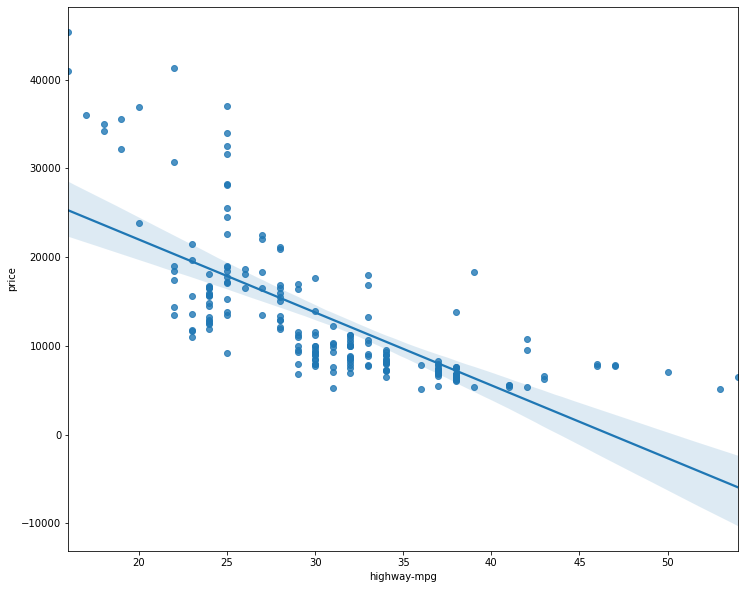

In [39]:
width = 12
height = 10 
plt.figure(figsize=(width,height))
sns.regplot(x='highway-mpg',y="price",data=df)
plt.ylim

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>


(0.0, 47414.1)

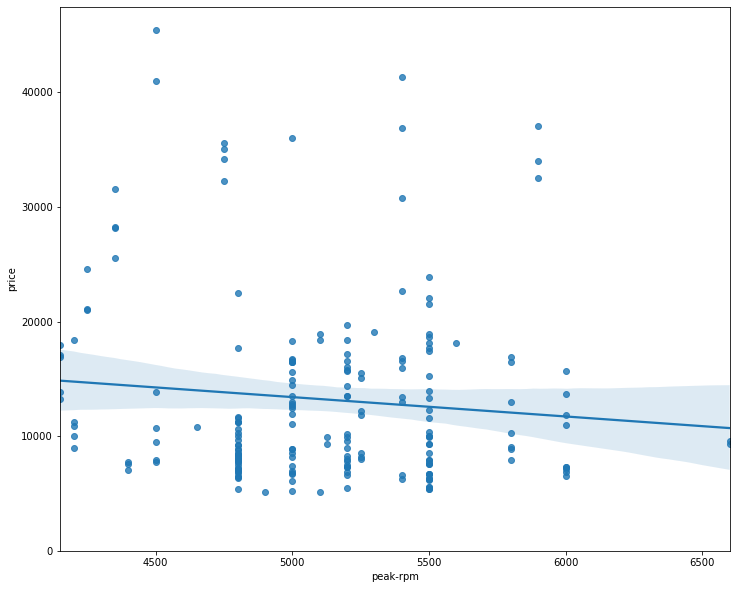

In [40]:
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm',y='price',data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>


In [42]:
# let us check confirm the above plots that we created using correlation
df[['peak-rpm','highway-mpg','price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>


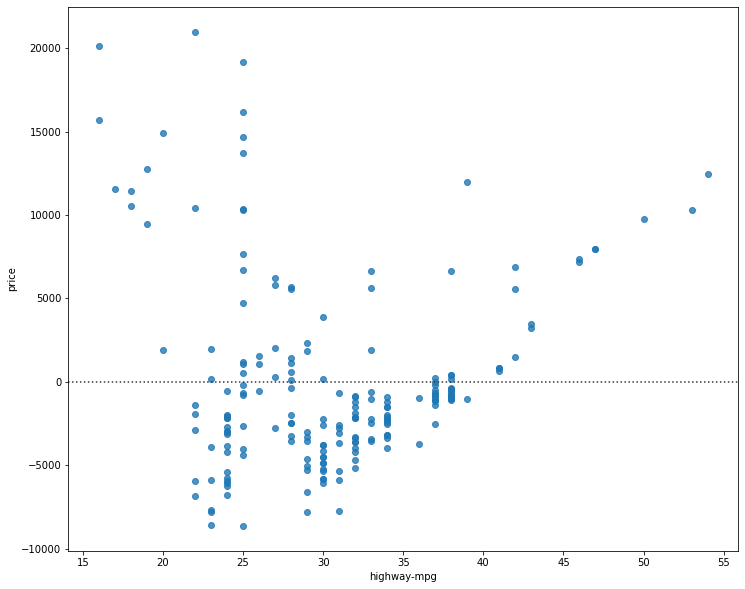

In [43]:
# Setting the parameters for a residual plot and plotting the residplot
width=12
height=10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'],df['price'])
plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>


### Visualizing a multiple linear regression model

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>


First lets make a prediction 


Z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [45]:
Yhat=lm.predict(Z)

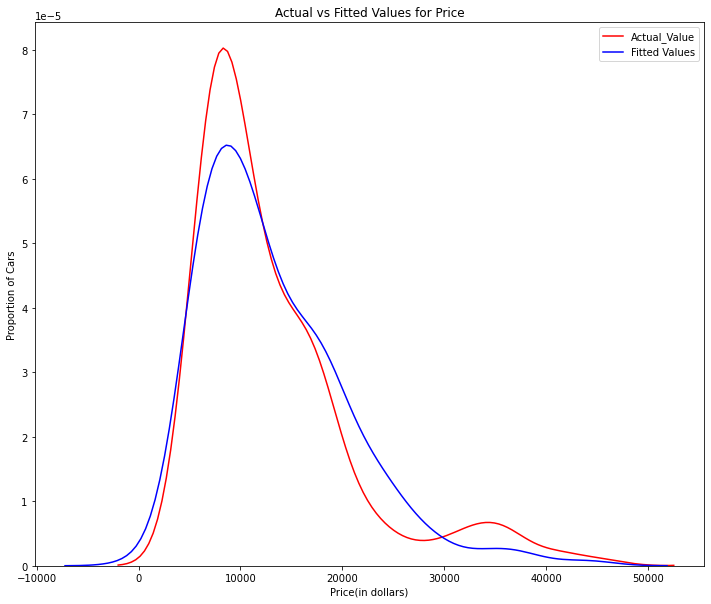

In [46]:
# let us plot 

plt.figure(figsize=(width,height))
ax1=sns.distplot(df['price'],hist=False,color='r',label="Actual_Value")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price(in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>


<h2>Polynomial Regression and Pipelines</h2>


<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>


<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$

<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$

<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$


In [53]:
# defining a function to plot the polynomial data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [48]:
# lets define the variables 
x = df['highway-mpg']
y = df['price']

In [49]:
# lets use the function polyfit, then use the poly1d to display polynomial function
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


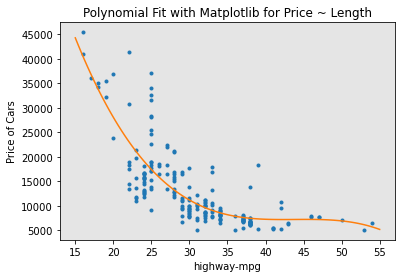

In [54]:
# now let us plot the function 
PlotPolly(p,x,y,'highway-mpg')

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


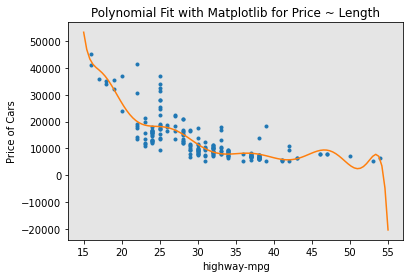

In [55]:
# lets create a 11 order polynomial model with variable x and y 
f1=np.polyfit(x,y,11)
p1=np.poly1d(f1)
print(p)
PlotPolly(p1,x,y,'highway-mpg')

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>


$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$


We can perform a polynomial transform on multiple features. First, we import the module:


In [56]:
# importing the PolynomialFeatures from sklearn.preprocessing

from sklearn.preprocessing import PolynomialFeatures

In [58]:
# lets create a polynomial feature of the degree 2
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [59]:
# let us fit the multivariate value that was defined earlier with Z
Z_pr=pr.fit_transform(Z)
Z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [62]:
Z_pr.shape

(201, 15)

In [63]:
Z.shape

(201, 4)

 We can see here that the original data has only 201 rows and 4 columns or featurs and after transformation has 15 features

<h2>Pipeline</h2>


<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>


In [64]:
# importing the necessary libraries 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator and its corresponding constructor.


In [65]:
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

We can see that pipeline enables us to do the entire preprocessing in a single line instead of mutiple lines of code

Now lets input the argument we created into a pipeline constructor 

In [66]:
# Input arguments into a pipleline constructor 
pipe=Pipeline(Input)

In [67]:
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [69]:
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

We can normalize the data,  perform a transform and fit the model simultaneously. 


 Similarly,  we can normalize the data, perform a transform and produce a prediction  simultaneously


In [70]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [73]:
#simple pipeline that standardizes data and and performs prediction using linear regression using features Z and y
Input=[('scale',StandardScaler()),('model',LinearRegression())]

In [74]:
pipe=Pipeline(Input)
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

<h2>Part 4: Measures for In-Sample Evaluation</h2>


<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>

<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>


<h3>Model 1: Simple Linear Regression</h3>


Let's calculate the R^2


In [75]:
# highway_mpg fit
X=df[["highway-mpg"]]
lm.fit(X,Y)
# the r^2 value is 
print('The R-square is:',lm.score(X,Y))

The R-square is: 0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "horsepower_fit".


In [78]:
# let us check the MSE or mean squared error 
Yhat=lm.predict(X)
print("The output of the first four predicted values is:",Yhat[0:4])

The output of the first four predicted values is: [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Lets import the sklearn library mean_square_error and compare the predicted to the actual results 

In [79]:
# import the necessary module
from sklearn.metrics import mean_squared_error

In [80]:
# now lets compare using the mean squared error method
mse=mean_squared_error(df['price'],Yhat)

In [81]:
# let us print the mean squared error results
print('The mean squared error of price and the predicted value is', mse)

The mean squared error of price and the predicted value is 31635042.944639895


<h3>Model 2: Multiple Linear Regression</h3>


Let's calculate the R^2


In [82]:
# fit the model
lm.fit(Z,df['price'])
# let find the R^2 value
print("The R-square value is:",lm.score(Z,df['price']))

The R-square value is: 0.8093562806577458


We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regression "multi_fit".



Let's calculate the MSE


In [83]:
# lets do prediction for multiple linear regression 
Y_mulreg=lm.predict(Z)

In [84]:
# lets compare the predicted values with actual result
print("The mean squared-error of the actual vs predicted price values is:",mean_squared_error(df['price'],Y_mulreg))

The mean squared-error of the actual vs predicted price values is: 11980366.870726489


<h3>Model 3: Polynomial Fit</h3>


In [85]:
# lets  import the required module as we are applying a different function
from sklearn.metrics import r2_score

In [86]:
r_squared=r2_score(y,p(x))
print("The R-square value is:", r_squared)

The R-square value is: 0.6741946663906516


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit


In [87]:
# lets calculate the mean square error for the polynomial fit 
mean_squared_error(df['price'],p(x))

20474146.42636123

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>


In [88]:
import matplotlib.pyplot as plt 
import numpy as np

In [89]:
%matplotlib inline

In [91]:
new_input=np.arange(1,100,1).reshape(-1,1)


In [92]:
lm.fit(X,Y)
lm

LinearRegression()

In [93]:
# lets  do the prediction for new input 
Yhat1=lm.predict(new_input)
Yhat1[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

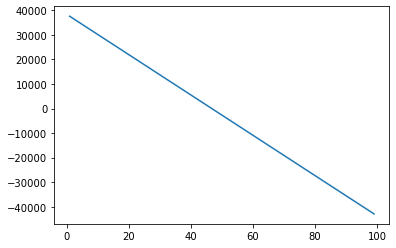

In [94]:
# let us plot the data
plt.plot(new_input,Yhat1)
plt.show()
plt.close()

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>

<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>


<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>

<p>Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.</p>

<p>So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.
<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.


<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>
<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.</p>
